In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
# #feature extraction using VGG-19
from keras.layers import Input
from keras.models import Model
from keras.applications.xception import Xception,preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#loading in the csv data
df = pd.read_csv('C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\train.csv',error_bad_lines=False)
fashion_dir = 'C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\fashion'
df.head()
from matplotlib import pyplot as plt
import cv2
for i in df.images:
    #print(i)
    imageName = 'C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\fashion\\'+ i
    image = cv2.imread(imageName) 
    #plt.imshow(image)
    #plt.title('Image')
    #plt.show()
df.nunique()
df.columns
batch_size = 32

In [5]:
from keras_preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    validation_split=0.20,
    rescale=1.0/255.0,
     horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    validation_split=0.20,
    rescale = 1./255)
training_set = train_generator.flow_from_dataframe(
    dataframe=df,
    directory=fashion_dir,
    x_col="images",
    y_col="target",
    target_size=(299,299),
    batch_size=batch_size,
    subset="training"
)

test_set = test_datagen.flow_from_dataframe(
    dataframe=df,
    directory=fashion_dir,
    x_col="images",
    y_col="target",
    target_size=(299,299),
    batch_size=batch_size,
    subset="validation"
)

Found 4800 validated image filenames belonging to 4 classes.
Found 1200 validated image filenames belonging to 4 classes.


In [6]:
classes = len(training_set.class_indices)

In [7]:
#add preprocessing layer to the front of Inception
IMAGE_SIZE = [299, 299]
xception = Xception(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

83697664/83683744 [==============================] - 68s 1us/step


In [8]:
#we will not train existing weights
for layer in xception.layers:
    layer.trainable = False
x = Flatten()(xception.output)
prediction = Dense(classes, activation='sigmoid')(x)
print(prediction)
# create a model object
model = Model(inputs=xception.input, outputs=prediction)
# view the structure of the model
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
r=model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
150/150 [==============================] - 1366s 9s/step - loss: 0.4955 - accuracy: 0.8807 - val_loss: 0.3457 - val_accuracy: 0.9400
Epoch 2/20
150/150 [==============================] - 1322s 9s/step - loss: 0.1035 - accuracy: 0.9833 - val_loss: 0.1917 - val_accuracy: 0.9625
Epoch 3/20
150/150 [==============================] - 1323s 9s/step - loss: 0.0706 - accuracy: 0.9893 - val_loss: 0.2398 - val_accuracy: 0.9658
Epoch 4/20
150/150 [==============================] - 1318s 9s/step - loss: 0.0479 - accuracy: 0.9965 - val_loss: 0.1302 - val_accuracy: 0.9767
Epoch 5/20
150/150 [==============================] - 1316s 9s/step - loss: 0.0273 - accuracy: 0.9986 - val_loss: 0.2002 - val_accuracy: 0.9667
Epoch 6/20
150/150 [==============================] - 1320s 9s/step - loss: 0.0320 - accuracy: 0.9974 - val_loss: 0.1946 - val_accuracy: 0.9717
Epoch 7/20
150/150 [==============================] - 1330s 9s/step - loss: 0.0228 - accuracy: 0.9980 - val_loss: 0.2493 - val_accuracy:

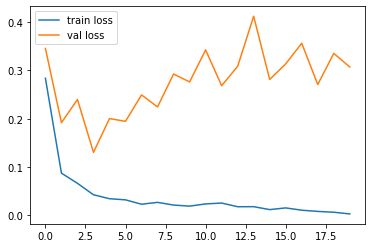

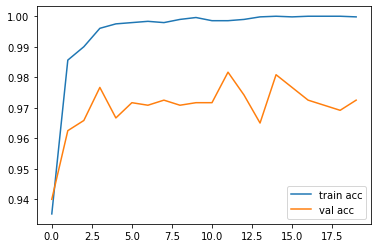

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

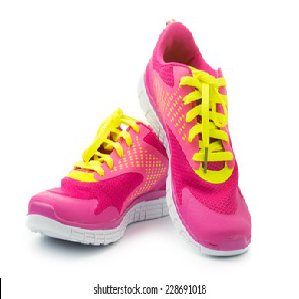

In [12]:
from keras.preprocessing import image
file_name = 'pair-pink-sport-shoes-on-260nw-228691018.jpg'
img = image.load_img(file_name, target_size=(299, 299))
img

In [17]:
from keras.applications.xception import Xception,preprocess_input
ary = image.img_to_array(img)
ary.shape

(299, 299, 3)

In [18]:
ary=ary/255


In [20]:
import numpy as np
x=np.expand_dims(ary,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 299, 299, 3)

In [22]:
print(model.predict(img_data))

[[6.0944402e-11 3.7080050e-04 1.0000000e+00 2.6056383e-19]]


Input image shape: (1, 299, 299, 3)


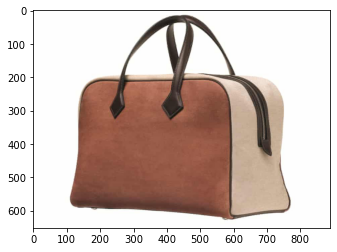

In [24]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
img_path = '2026.jpg'

img = image.load_img(img_path, target_size=(299, 299))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [25]:

print(model.predict(x))

[[1. 0. 0. 0.]]
